# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [104]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SasiH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SasiH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [29]:
stop_words = stopwords.words('english')
sia = vader.SentimentIntensityAnalyzer()


## Macbeth

Make a list of the words in Macbeth by tokenizing the macbeth_string:

In [94]:
#tokenizing the words
macbeth_words = word_tokenize(macbeth_string)
#print(macbeth_words)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.

Write a for loop that iterates over your Macbeth word list, and:
* if the compound score of a word is positive, add the word to the positive-word list
* if the compound score of a word is negative, add the word to the negative-word list

In [91]:
positivewords = []
negativewords = []

for i in macbeth_words:
    
    p_scores=sia.polarity_scores(i)
    if (p_scores['compound'])>=0.5:
        positivewords.append(i)
    elif (p_scores['compound'])<=-0.5:
        negativewords.append(i)
    
        
            
    
    

In [93]:
##printing positive and negative words from the list
#print('Printing Positive Words:')
#print(positivewords)
#print('Printing Negative Words:')
#print(negativewords)

For any list `mylist`, you can get the word frequencies of words in `mylist` using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.

Use these commands to:
1. find the 15 most common negative words in Macbeth and the 15 most common positive words
2. make a horizontal bar plot similar to the plots in the following
3. comment on similarities and differences to the Macbeth plot below

(Plot taken from https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/)

![Pos-Neg-Words in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-19-1.png)

Top 15 most common positive words


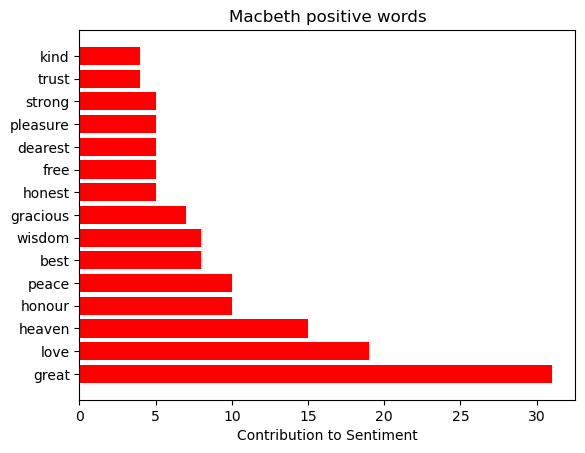

Top 15 most common negative words


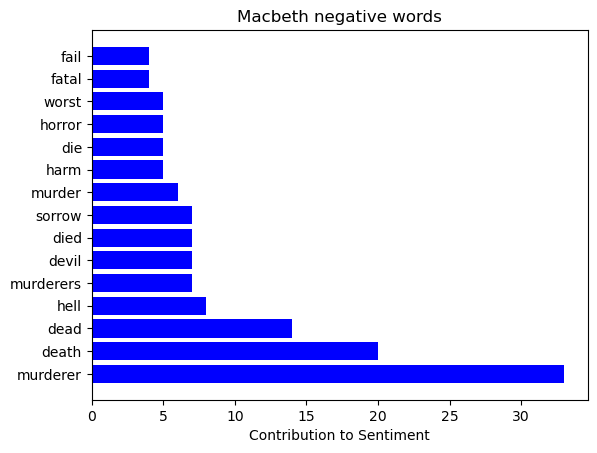

In [112]:
# Code:
print('Top 15 most common positive words')
positive15 = nltk.FreqDist(positivewords).most_common(15)

x_pos=[]
y_pos=[]
for i in positive15:
    x_pos.append(i[0])
    y_pos.append(i[1])

plt.rcdefaults()
fig, ax = plt.subplots()




ax.barh(x_pos,y_pos, align='center',color= 'red')

ax.set_xlabel('Contribution to Sentiment')
ax.set_title('Macbeth positive words')
plt.show()
print('Top 15 most common negative words')
negative15 = nltk.FreqDist(negativewords).most_common(15)

x_neg=[]
y_neg=[]
for i in negative15:
    x_neg.append(i[0])
    y_neg.append(i[1])

plt.rcdefaults()
fig, ax = plt.subplots()    


ax.barh(x_neg,y_neg, align='center',color= 'blue')


ax.set_xlabel('Contribution to Sentiment')
ax.set_title('Macbeth negative words')
plt.show()
##print(negative15)

### Make this a markdown cell for your comments:
### In our chart Murder is the most frequent negative word  while fear in the above example plots
### In our chart great is the most frequent positive word while good is the most frequent in the above sample plot
### The words list and frequency also differs in our charts compared to the exapmle plot.




The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

In [ ]:
# Code:



In [ ]:
# Make this a markdown cell for your comments:



* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

In [ ]:
# Code:



In [ ]:
# Make this a markdown cell for your comments:



## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):
![Sentiment Evolution in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-11-1.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by summing the compound scores of all the words in that scene
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

In [ ]:
# Code:



In [ ]:
# Make this a markdown cell for your comments:



Second:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

In [ ]:
# Code:



In [ ]:
# Make this a markdown cell for your comments:



Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [ ]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [ ]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

Third plot:

* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [ ]:
# Code:



In [ ]:
# Make this a markdown cell for your comments:



Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [ ]:
# Code:



In [ ]:
# Make this a markdown cell for your comments:



What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?